<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Object_Detection_Data_Collection_and_Preparing_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-vqr2kl5z
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-vqr2kl5z
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15716 sha256=c2cf5a80951c01f0dba74db6467868794fb58d5af772d2138e4e0e49f3076dfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-2fhme9lh/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [38]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()


In [39]:
arguments = {"keywords":"polar bear in artic,penguin in antartica","limit":6,"format":"jpg","print_urls":True}
paths = response.download(arguments)



Item no.: 1 --> Item name = polar bear in artic
Evaluating...
Starting Download...
Image URL: https://environment-review.yale.edu/sites/default/files/styles/flexslider_full/public/polar-bear-yer.jpg?itok=9TCDAJWV
Completed Image ====> 1.polar-bear-yer.jpg
Image URL: https://arctickingdom.com/wp-content/uploads/2017/08/davebriggsphotography-049A3218-headercrop-1.jpg
Completed Image ====> 2.davebriggsphotography-049a3218-headercrop-1.jpg
Image URL: https://www.intrepidtravel.com/adventures/wp-content/uploads/2019/01/Peregrine-Adventures-Norway_Svalbard_June-06-2018-49.jpg
Completed Image ====> 3.peregrine-adventures-norway_svalbard_june-06-2018-49.jpg
Image URL: https://media.gadventures.com/media-server/cache/c6/2e/c62e5721fef11ef37d6c0815821c7b25.jpg
Completed Image ====> 4.c62e5721fef11ef37d6c0815821c7b25.jpg
Image URL: https://cdn.britannica.com/52/162652-050-6A676116/Polar-bears-ice-floe-Norway.jpg
Completed Image ====> 5.polar-bears-ice-floe-norway.jpg
Image URL: https://i.ytimg.c

In [40]:
!git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [41]:
%%bash
cd models/research/
protoc object_detection/protos/*.protos --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1461234 sha256=0ec3a48e7eec3230ce5c5b63a2b9112e743464c62801989ce0f4f0b3132c652b
  Stored in directory: /tmp/pip-ephem-wheel-cache-wl1vpsaf/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


object_detection/protos/*.protos: No such file or directory


In [42]:
import numpy as np
from six import BytesIO
from PIL import Image,ImageDraw,ImageFont

from IPython.display import display, Javascript
from IPython.display import Image as IPyImage


import numpy as np
import glob
import os

from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [23]:
import tensorflow.compat.v1 as tf

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile  (path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [43]:
polar_image_path = "/content/downloads/polar bear in artic/*"
polar_images_np = []
for iname in glob.glob(polar_image_path):
  polar_images_np.append(load_image_into_numpy_array(iname))

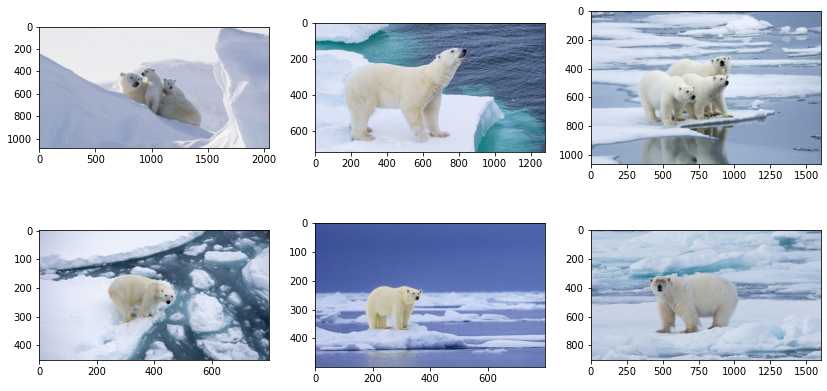

In [44]:
plt.rcParams['figure.figsize'] = [14, 7]

for idx, polar_image_np in enumerate(polar_images_np):
  plt.subplot(2, 3, idx+1)
  plt.imshow(polar_image_np)
plt.show()


In [45]:
gt_boxes=[]
colab_utils.annotate(polar_images_np,box_storage_pointer=gt_boxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [46]:
gt_boxes

[array([[0.30833333, 0.34277344, 0.82333333, 0.7109375 ]]),
 array([[0.18166667, 0.10234375, 0.91666667, 0.72578125]]),
 array([[0.26666667, 0.2       , 0.85333333, 0.634375  ]]),
 array([[0.31833333, 0.29      , 0.72166667, 0.62375   ]]),
 array([[0.38666667, 0.2075    , 0.77166667, 0.4725    ]]),
 array([[0.31833333, 0.245     , 0.80666667, 0.65125   ]])]

In [47]:
gt_boxes
np.save("weights",gt_boxes)

In [48]:
!ls

downloads  models  sample_data	weights.npy


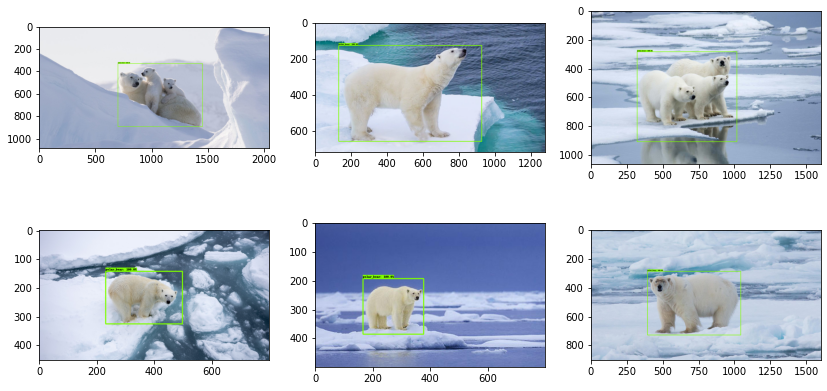

In [49]:
for idx in range(6):
  plt.subplot(2,3, idx+1)
  image_np_with_annotations = polar_images_np[idx].copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]],dtype=np.int32),
      np.array([1.0],dtype=np.float32),
      {1:{"id":1,'name':'polar_bear'}},
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  plt.imshow(image_np_with_annotations)


https://google-images-download.readthedocs.io/en/latest/arguments.html
